<a href="https://colab.research.google.com/github/caseynv/mojaglobal/blob/master/worlddatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install GDAL
!pip install seaborn
!pip install geoplot
!pip install matplotlib
!pip install tifffile
!pip install geojson -q
!pip install geopandas -q

import os
import zipfile
import glob
import io
import tifffile
import requests
import geopandas as gpd
import geojson
from shapely.geometry import Polygon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import json
import requests
import numpy as np
from matplotlib.image import imread
import tifffile as tiff

%matplotlib inline

GeoTIFFs files are raster image file types that are commonly used to store satellite and aerial imagery data, along with geographic metadata that describes the location in space of the image. A Tagged Image File Format (.TIFF or .TIF) is the most commonly used raster graphic file type. Tifffile is a Python library that stores numpy arrays in TIFF file.

In [ ]:

url = 'https://datasets.mojaglobal.workers.dev/0:/Soil/GlobalSoilOrganicCarbonDensityinkgCm_1mDepth.tif'

r = requests.get(url)
ret = tiff.imread(io.BytesIO(r.content))

#numpy arrays
ret

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       ...,
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32)

Soil organic carbon is a general term for the total of all the different non-living organic compounds in the soil, it also excludes dead plants and animals. The organic carbon in the soil is used by plants for nourishment as they grow, and the plants themselves replenish the resource when they decay after they die. Loss of forests not only reduces carbon stocks in vegetation but also causes significant losses of soil organic carbon. 

Although it would seem that high densities of soil carbon would correspond to areas where vegetation thrives, this is not necessarily the case. For example, the regions of the world categorized as tropical rainforest typically have very low quality soils - not because the soils are bad, rather because the highly active vegetation on the surface has already extracted most of the nutrient from the soil. The regions of the world where soil carbon accumulates, are therefore regions where vegetation growth is generally slower - such as swamps, bogs, and wetlands. The most of the global organic carbon is stored in the forest soil. The large quantity of CO2 emitted from soil is a consequence of land use change, both through human activities (e.g. agriculture) or natural hazards (e.g. flooding, landslides, erosion). A net carbon loss from soils adds to the increase in the atmospheric CO2 concentration, probably leading to higher global temperatures.

Text(0.5, 1.0, 'Global Soil Organic Carbon Density in kg Carbon per m3')

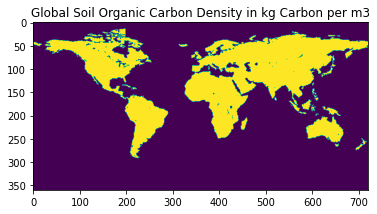

In [ ]:


url = 'https://datasets.mojaglobal.workers.dev/0:/Soil/GlobalSoilOrganicCarbonDensityinkgCm_1mDepth.tif'

r = requests.get(url)
ret = tiff.imread(io.BytesIO(r.content))
plt.imshow(ret)
plt.title('Global Soil Organic Carbon Density in kg Carbon per m3')


In [6]:
#!wget downloads the file 
!wget 'https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/KoppenGeigerClimateShifts.zip'

with zipfile.ZipFile('KoppenGeigerClimateShifts.zip', 'r') as shifts:
  shifts.extractall("shifts")

%rm KoppenGeigerClimateShifts.zip

files = glob.glob(os.path.join('/content/shifts', '*.geojson'))

c = [i[26:28] + '_' + i[16:25] for i in files]

new_files = [gpd.read_file(m) for m in files]

contents = list(zip(c, new_files))
files


--2021-11-04 20:50:36--  https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/KoppenGeigerClimateShifts.zip
Resolving datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)... 104.21.60.214, 172.67.201.202, 2606:4700:3034::ac43:c9ca, ...
Connecting to datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)|104.21.60.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2872855 (2.7M) [application/x-zip-compressed]
Saving to: ‘KoppenGeigerClimateShifts.zip.1’

KoppenGeigerClimate 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-11-04 20:50:45 (38.3 MB/s) - ‘KoppenGeigerClimateShifts.zip.1’ saved [2872855/2872855]



['/content/shifts/2051-2075-A1FI.geojson',
 '/content/shifts/2001-2025-A2.geojson',
 '/content/shifts/2076-2100-B1.geojson',
 '/content/shifts/2076-2100-B2.geojson',
 '/content/shifts/2001-2025-B1.geojson',
 '/content/shifts/2026-2050-B2.geojson',
 '/content/shifts/2051-2075-A2.geojson',
 '/content/shifts/2026-2050-A1FI.geojson',
 '/content/shifts/2051-2075-B2.geojson',
 '/content/shifts/1951-1975.geojson',
 '/content/shifts/2001-2025-B2.geojson',
 '/content/shifts/2026-2050-B1.geojson',
 '/content/shifts/1976-2000.geojson',
 '/content/shifts/2051-2075-B1.geojson',
 '/content/shifts/2076-2100-A1FI.geojson',
 '/content/shifts/1901-1925.geojson',
 '/content/shifts/2076-2100-A2.geojson',
 '/content/shifts/1926-1950.geojson',
 '/content/shifts/2001-2025-A1FI.geojson',
 '/content/shifts/2026-2050-A2.geojson']

In [ ]:
new_files


[      OBJECTID  ...                                           geometry
 0            1  ...  POLYGON ((-37.50000 83.50000, -37.50000 84.000...
 1            2  ...  POLYGON ((-33.50000 83.00000, -33.50000 83.500...
 2            3  ...  POLYGON ((-42.50000 83.50000, -42.50000 82.500...
 3            4  ...  POLYGON ((-70.00000 82.00000, -70.00000 82.500...
 4            5  ...  POLYGON ((-80.00000 81.50000, -80.00000 82.000...
 ...        ...  ...                                                ...
 2190      2191  ...  POLYGON ((-59.50000 -73.00000, -59.50000 -73.5...
 2191      2192  ...  POLYGON ((168.50000 -76.50000, 168.50000 -76.0...
 2192      2193  ...  POLYGON ((-66.00000 -77.00000, -66.00000 -76.5...
 2193      2194  ...  POLYGON ((-159.00000 -80.00000, -159.00000 -79...
 2194      2195  ...  POLYGON ((-127.00000 -74.00000, -128.00000 -74...
 
 [2195 rows x 6 columns],
       OBJECTID  ...                                           geometry
 0            1  ...  POLYGON ((-37.

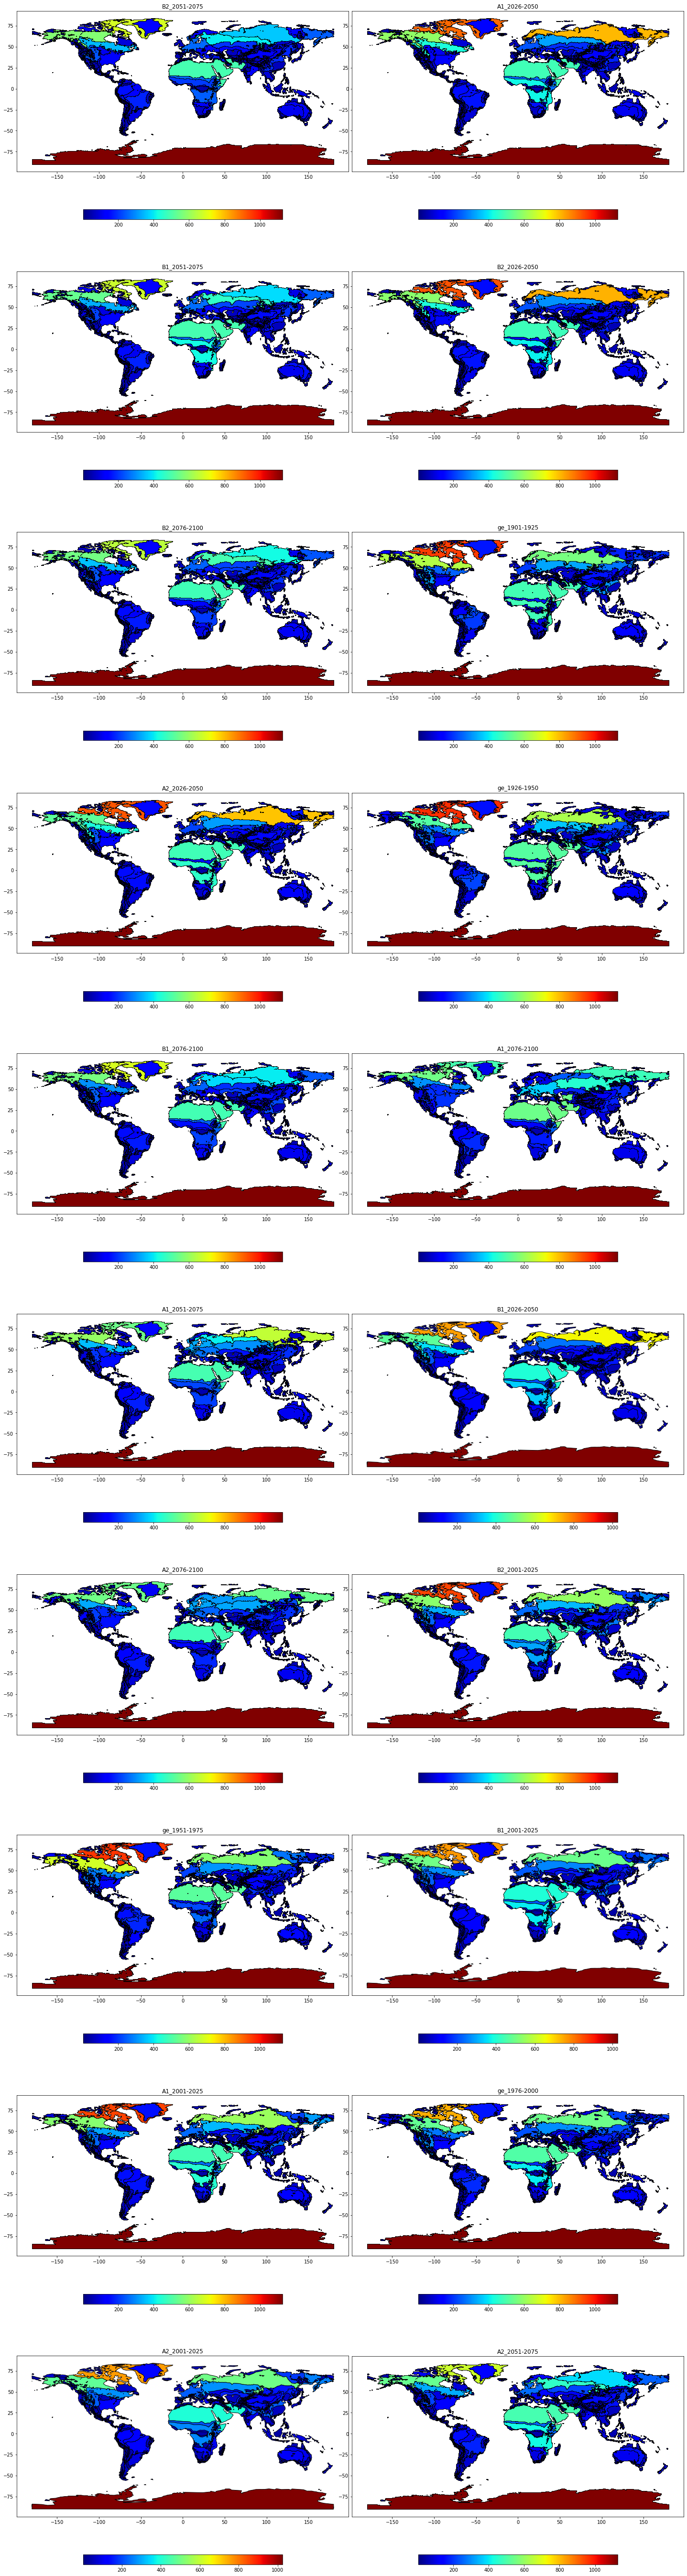

In [ ]:

fig, axs = plt.subplots(10,2, figsize=(25, 100), edgecolor='k')
fig.subplots_adjust(hspace = 0.03, wspace=0.01)

for ax, i in zip(axs.ravel(),contents) :
    name, df = i
    # convert from goemetry coordinate system to projrcted coordinate system
    df.set_crs(epsg=4326, inplace=True)
    df.plot(ax=ax, column='Shape_Length', edgecolor='black', cmap='jet', legend=True, legend_kwds= {'orientation': "horizontal", 'shrink': 0.6})
    ax.set_title(str(name))

The set of scenarios consists of six scenario groups drawn from the four families from Intergovernmental Panel on Climate Change(IPCC):
one group each in A2, B1, B2, and three groups within the A1 family, characterizing alternative developments of energy
technologies: A1FI (fossil fuel intensive), A1B (balanced), and A1T (predominantly non-fossil fuel). 


IPCC SRES (Special Report on Emissions Scenarios - SRES) scenarios were constructed to explore future developments in the global environment with special reference to the production of greenhouse gases and aerosol precursor emissions.

The IPCC SRES scenarios contain various driving forces of climate change, including population growth and socio-economic development. These drivers encompass various future scenarios that might influence greenhouse gas (GHG) sources and sinks, such as the energy system and land use change. The evolution of driving forces underlying climate change is highly uncertain. This results in a very wide range of possible emissions paths of greenhouse gases.

The SRES team defined four narrative storylines labeled A1, A2, B1 and B2, describing the relationships between the forces driving greenhouse gas and aerosol emissions and their evolution during the 21st century for large world regions and globally. Each storyline represents different demographic, social, economic, technological, and environmental developments that diverge in increasingly irreversible ways.

* A1: globalization, emphasis on human wealth Globalized, intensive (market forces)
The A1 storyline and scenario family describes a future world of very rapid economic growth, global population that peaks in mid-century and declines thereafter, and the rapid introduction of new and more efficient technologies. Major underlying themes are convergence among regions, capacity building, and increased cultural and social interactions, with a substantial reduction in regional differences in per capita income. The A1 scenario family develops into three groups that describe alternative directions of technological change in the energy system. The three A1 groups are distinguished by their technological emphasis: fossil intensive (A1FI), non-fossil energy sources (A1T), or a balance across all sources.

* A2: regionalization, emphasis on human wealth Regional, intensive (clash of civilizations)
The A2 storyline and scenario family describes a very heterogeneous world. The underlying theme is self-reliance and preservation of local identities. Fertility patterns across regions converge very slowly, which results in continuously increasing global population. Economic development is primarily regionally oriented and per capita economic growth and technological change are more fragmented and slower than in other storylines.
B1: globalization, emphasis on sustainability and equity Globalized, extensive (sustainable development)
The B1 storyline and scenario family describes a convergent world with the same global population that peaks in midcentury and declines thereafter, as in the A1 storyline, but with rapid changes in economic structures toward a service and information economy, with reductions in material intensity, and the introduction of clean and resource-efficient technologies. The emphasis is on global solutions to economic, social, and environmental sustainability, including improved equity, but without additional climate initiatives.

* B2: regionalization, emphasis on sustainability and equity Regional, extensive (mixed green bag)
The B2 storyline and scenario family describes a world in which the emphasis is on local solutions to economic, social, and environmental sustainability. It is a world with continuously increasing global population at a rate lower than A2, intermediate levels of economic development, and less rapid and more diverse technological change than in the B1 and A1 storylines. While the scenario is also oriented toward environmental protection and social equity, it focuses on local and regional levels.


This system is based on the temperature, the amount of precipitation, and the times of year when precipitation occurs. The Köppen climate classification scheme divides climates into five main climate groups: A (tropical), B (dry), C (temperate), D (continental), and E (polar) which is not sufficient to explain climate shifts adequately.

For instance, the amount of rainfall received in an area is an important determining factor in estimating or quantifying the amount of water available to meet various demands, such as agricultural, industrial, domestic water supply and power generation. According to the availability or non-availability of rainfall is normally employed to determine the level of wetness or dryness during the growing season which makes rainfall the single most important element of the climate system affecting the agricultural and water resource management of any region.

However, in recent time, the occurrence of dry spell in Northern Nigeria has increased public concern that the north central region might be undergoing climatic shift towards aridity. This is against the backdrop that declining rainfall
has adverse impact on water resources, agricultural output and economic performance of a given region.
Arising from above, it is pertinent to emphasize that studies of rainfall variability are crucial in mitigating the consequences of extreme climate hazards such
as droughts and floods. This is premised on the fact that the amount of water available in the soil which crops utilize is dependent on important rainfall characteristics such as onset, length and cessation which influence the success/failure of the cropping season. It then follows, that a clear understanding of rainfall variability as an element of the climate system is vital in developing and improving adaptation strategies of a drought vulnerable region like North central Nigeria whose sources of livelihood is rainfall dependent.

# References

* https://www.fao.org/3/bs047e/bs047e.pdf


* https://www.ipcc.ch/site/assets/uploads/2018/03/sres-en.pdf

* https://www.ess.co.at/METEO/CCS.html